# Assignment 2

## Part 1

In [8]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [9]:
library(dplyr)
library(ggplot2)
library(dslabs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
data(divorce_margarine)

In [7]:
str(divorce_margarine)

'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


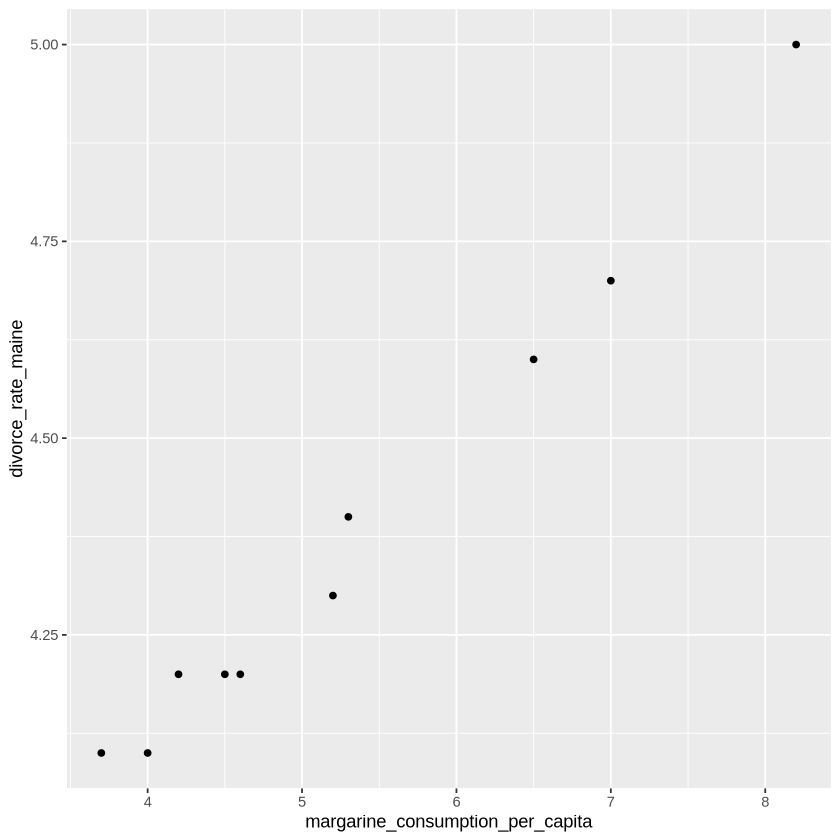

In [10]:
ggplot(divorce_margarine,
       aes(x = margarine_consumption_per_capita,
           y = divorce_rate_maine)) +
    geom_point()

In [12]:
cor.test(divorce_margarine$divorce_rate_maine, divorce_margarine$margarine_consumption_per_capita)


	Pearson's product-moment correlation

data:  divorce_margarine$divorce_rate_maine and divorce_margarine$margarine_consumption_per_capita
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


In [13]:
# There seems to be a correlation between the two variables, because the value of r is close to 1 (0.993).
# It is also abvious from the plot visually where it shows a positive correlation
# Conclusion: According to the model an increase in the preference for margarine would lead to a higher divorce rate.
# However we have not explained the cause and this could be a co-incidence

## Part 2

In [14]:
install.packages('car')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘backports’, ‘cowplot’, ‘Deriv’, ‘modelr’, ‘microbenchmark’, ‘broom’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘survival’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [15]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [16]:
data(GSSvocab)

In [17]:
str(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [20]:
# filtering for the year 1978 and removing rows
data1978 <- GSSvocab %>%
    filter(year==1978) %>%
    na.exclude(data1978)

str(data1978)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


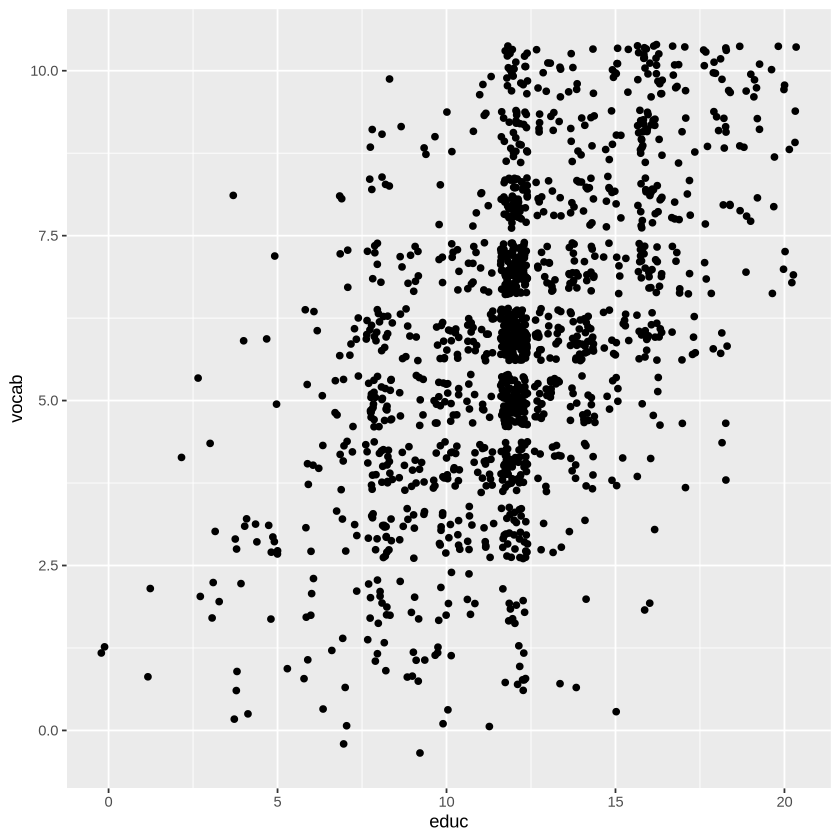

In [22]:
# Visualizing the relationsship between a person’s score on the vocabulary test and their level  of education
ggplot(data1978,
       aes(x = educ,
           y = vocab)) +
    geom_point(position = 'jitter')

In [23]:
cor.test(data1978$vocab, data1978$educ)


	Pearson's product-moment correlation

data:  data1978$vocab and data1978$educ
t = 24.443, df = 1475, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4996008 0.5722586
sample estimates:
      cor 
0.5369246 


In [24]:
# Making a linear model of the correlation
vocab_model <- lm(vocab ~ educ, data1978)
summary(vocab_model)


Call:
lm(formula = vocab ~ educ, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


In [25]:
# There seems to be a  correlation between the two variables because the p-value seems to be signifcant.
# From the plot it shows that the correlation is positive.
# However the value of r-squared indicates that it is only about 29% of the variance that can be accounted for by the model.
# In conclusion, a person’s score on the vocabulary test is somewhat significantly impacted by their level of education

In [ ]:
# Adding the nativeborn predictor to the model

m3 <- lm(cty ~ cyl * make, Audi_VW)